In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

img = cv2.imread('/content/drive/MyDrive/Freelance_Portfolio/Fatih/thermal_image/'+input('Please input Image name: '))
#nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5), np.uint8)

y=int(input('Please enter starting point of y-axis: '))#0
x=int(input('Please enter starting point of x-axis: '))#0
h=int(input('Please enter height of image: '))#750
w=int(input('Please enter width of image: '))#1100


Please input Image name: Image1Medical.png
Please enter starting point of y-axis: 0
Please enter starting point of x-axis: 0
Please enter height of image: 750
Please enter width of image: 1100


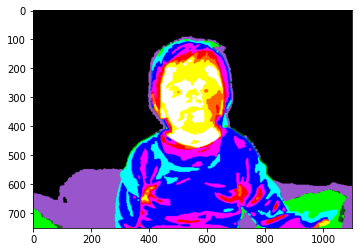

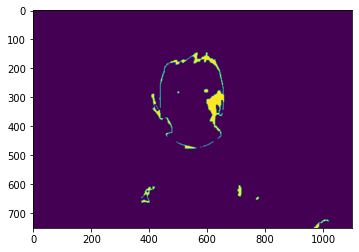

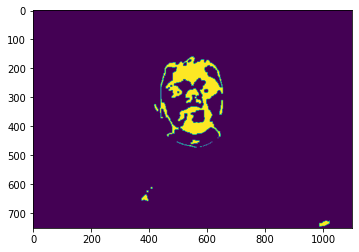

The person has normal temperature at 36.0 C


In [9]:
crop_img = img[y:y+h, x:x+w]

img_opening = cv2.morphologyEx(crop_img, cv2.MORPH_OPEN, kernel)
crop_img = cv2.morphologyEx(img_opening, cv2.MORPH_CLOSE, kernel)

hsv = cv2.cvtColor(crop_img , cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(10, 100, 20), (25, 255, 255) ) #ni untuk orange
mask2 = cv2.inRange(hsv,(22, 93, 0), (45, 255, 255) ) #ni untuk kuning

plt.imshow(crop_img[:,:,::-1]) #original image
plt.show()
plt.imshow(mask) #feature extraction image orange2
plt.show()
plt.imshow(mask2) #feature extraction image yellow
plt.show()

pixels = cv2.countNonZero(mask)
# pixels = len(np.column_stack(np.where(thresh > 0)))
image_area = crop_img.shape[0] * crop_img.shape[1]
area_ratio = (pixels / image_area) * 100
#print(area_ratio)

pixels2 = cv2.countNonZero(mask2)
# pixels = len(np.column_stack(np.where(thresh > 0)))

image_area2 = crop_img.shape[0] * crop_img.shape[1]
area_ratio2 = (pixels2 / image_area2) * 100
#print(area_ratio2)

if area_ratio > area_ratio2:
  print('The person has hot temperature at ' + '37.6 C')
else:
  print('The person has normal temperature at ' + '36.0 C')